#### Business Understanding
The first step is to understand the problems and questions we are interested in tacking in this data set. So here are the questions raised while going through the data :
    <li>What is the most demanded Programming Language ?
    <li>How many years of work experience do you need?
    <li>What is the most popular degree mentioned under Minimum Qualifications?

In [73]:
#Importing Libraries
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import re
%matplotlib inline

#### Data Understanding
The next stage of the CRISP-DM process is the understanding of data. It typically involves the following steps:
    <li>Determine what data is needed
    <li>Collect data, if required data is not available
    <li>Explore data
    <li>Verify data quality
    
In this case we got the data from Kaggle.


In [74]:
#Reading the data 
df_google = pd.read_csv("C:/Users/hessa.shamnad/Desktop/Data Science Project/job_skills.csv")
df_google.head()


,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [75]:
df_google.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,Interest in the technology industry and Google...
freq,1227,35,168,190,33,32,32


#### Data Preparation
Now that we understand what raw data we are dealing with, we prepare it for our analysis and modeling.Let’s start with data cleaning. This is where we decide what to do with missing values, outliers etc.I noticed that the there are some some missing values under Responsibilities, Minimum and Preferred Qualification. So i decided to drop those and make it euqal for our analysis.

In [76]:
if sum(df_google.isnull().sum()) > 0: # There exist some NaN values
    df_google.dropna(inplace=True)

In [77]:
df_google.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1235,1235,1235,1235,1235,1235,1235
unique,2,779,23,91,801,806,820
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,"Previous internship experience in Sales, Adver..."
freq,1212,35,168,187,33,32,32


now it looks better! lets look at those Questions.

#### Modeling
In this step, usually we use Machine learning models to answer question. But in this case, I didn't use any of the models as the questions were based on frequency of variables like most demanded language, degree and work experience.

In [78]:
# graph function
def graph(df):
    colors = plt.cm.Pastel1(np.linspace(0, 1, 10))
    df.plot.barh(x=df.columns[0],y=df.columns[1],figsize=(25,20), legend=True,stacked=True, color = colors )
    # add a suptitle
    plt.suptitle( df.columns[0] +" "+ df.columns[1]+" "+ "at Google", fontsize=25)
    
    plt.xlabel(df.columns[1], fontsize=25)
    plt.ylabel(df.columns[0],fontsize=25)
    # change xticks fontsize to 14
    plt.yticks(fontsize=20)
    plt.gca().invert_yaxis()
    # finally show the plot
    plt.show()

In [79]:
language_list = ['go','r', 'sas', 'matlab','stata','python', 'java','net', 'c++','html','css', 'php', \
                            'javascript', 'objective-c', 'ruby', 'perl','c','c#', 'sql','mysql','mapreduce','hadoop','kotlin']
min_qualifications = job_skills['Minimum Qualifications'].tolist()
min_qualifications_string = ''.join(map(str, min_qualifications)).lower()

In [88]:
program_count = dict((keys,0) for keys in programing_language_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", min_qualifications_string):
    if w in program_count:
        program_count[w] += 1

print(program_count)

language_df = pd.DataFrame.from_dict(program_count, orient='index').sort_values(by=0,ascending=False).reset_index()
language_df.columns=['Programming_Language', 'Demand']
language_df['Programming_Language'] = language_df.Programming_Language.str.capitalize()
#language_df = language_df[::-1] 
language_top = language_df.head(5)

{'go': 26, 'r': 37, 'sas': 18, 'matlab': 20, 'stata': 11, 'python': 97, 'java': 76, 'net': 12, 'c++': 54, 'html': 36, 'css': 22, 'php': 7, 'javascript': 77, 'objective-c': 3, 'ruby': 14, 'perl': 6, 'c': 18, 'c#': 15, 'sql': 73, 'mysql': 9, 'mapreduce': 8, 'hadoop': 8, 'kotlin': 3}


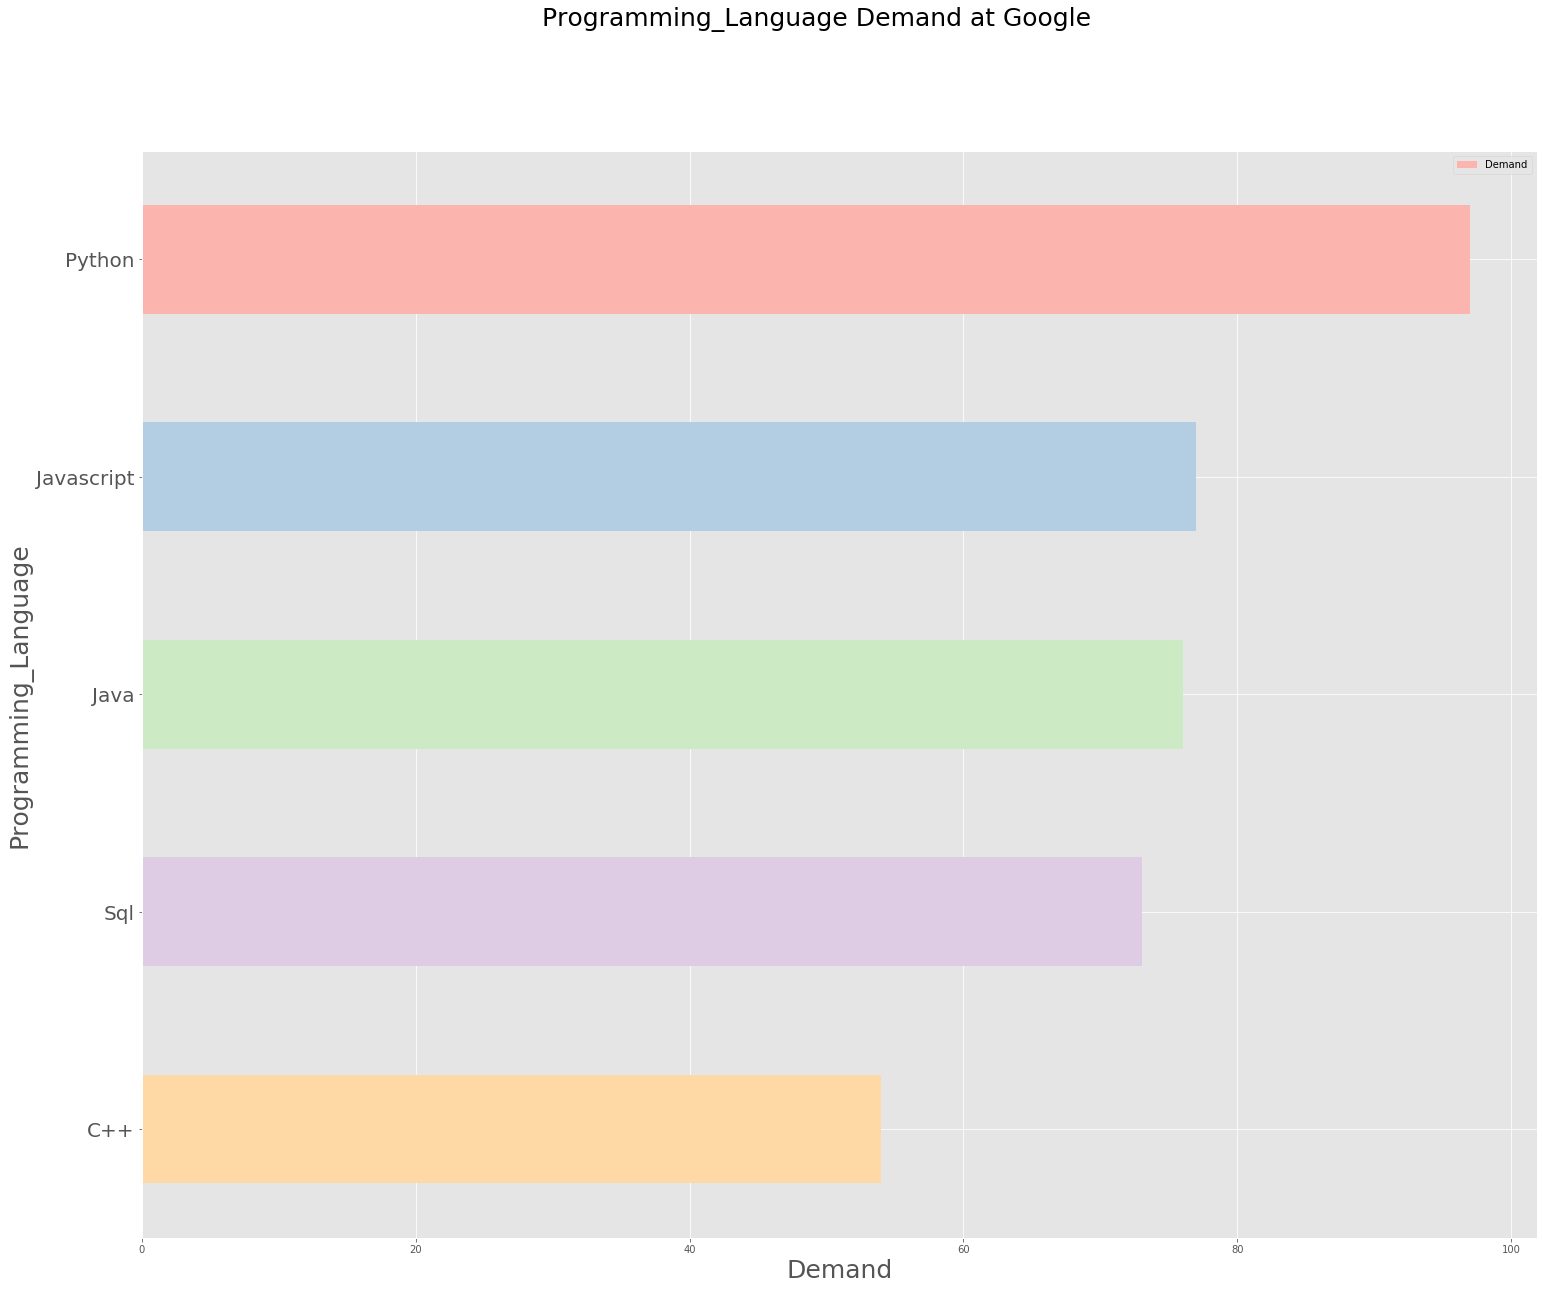

In [89]:
graph(language_top)

In [86]:
work_exp = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]+) year', min_qualifications_string):
     work_exp[w] += 1
        

work_exp_df = pd.DataFrame.from_dict(work_exp, orient='index').sort_values(by=0,ascending=False).reset_index()
work_exp_df.columns=['Years of experience', 'Demanded'] 
#work_exp_df = work_exp_df[::-1] 
work_exp_df.head(10)

,Years of experience,Demanded
0,5,181
1,3,114
2,4,92
3,10,76
4,8,65
5,2,60
6,6,60
7,7,41
8,12,18
9,1,16


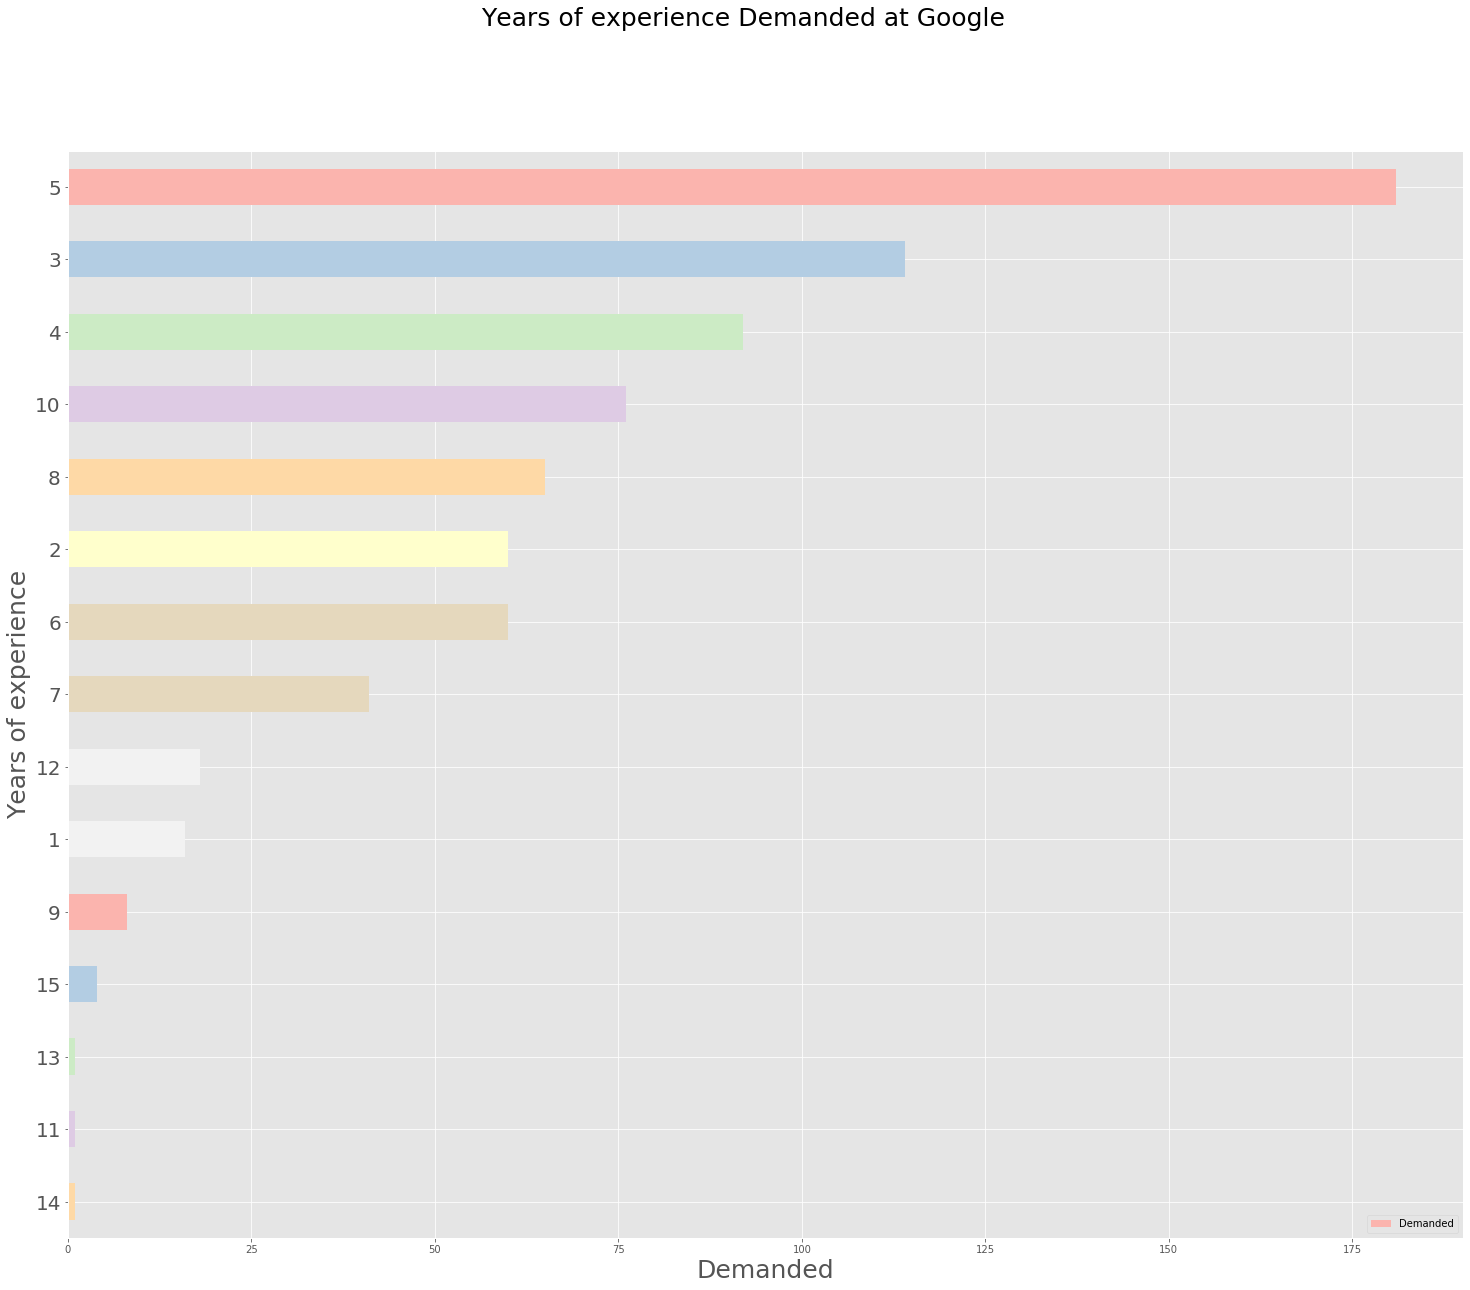

In [87]:
graph(work_exp_df)

In [90]:
degree_list = ["ba", "bs", "bachelor's", "phd",'mba','bachelor']
degree_count = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", min_qualifications_string):
    if w in degree_count:
        degree_count[w] += 1

        
degree_df = pd.DataFrame.from_dict(degree_count, orient='index').sort_values(by=0,ascending=False).reset_index()
degree_df.columns=['Degree', 'Demand'] 
degree_df['Degree'] = degree_df.Degree.str.upper() 
#degree_df = degree_df[::-1] 
degree_df

,Degree,Demand
0,BS,877
1,BA,800
2,BACHELOR'S,147
3,MBA,73
4,BACHELOR,15
5,PHD,8


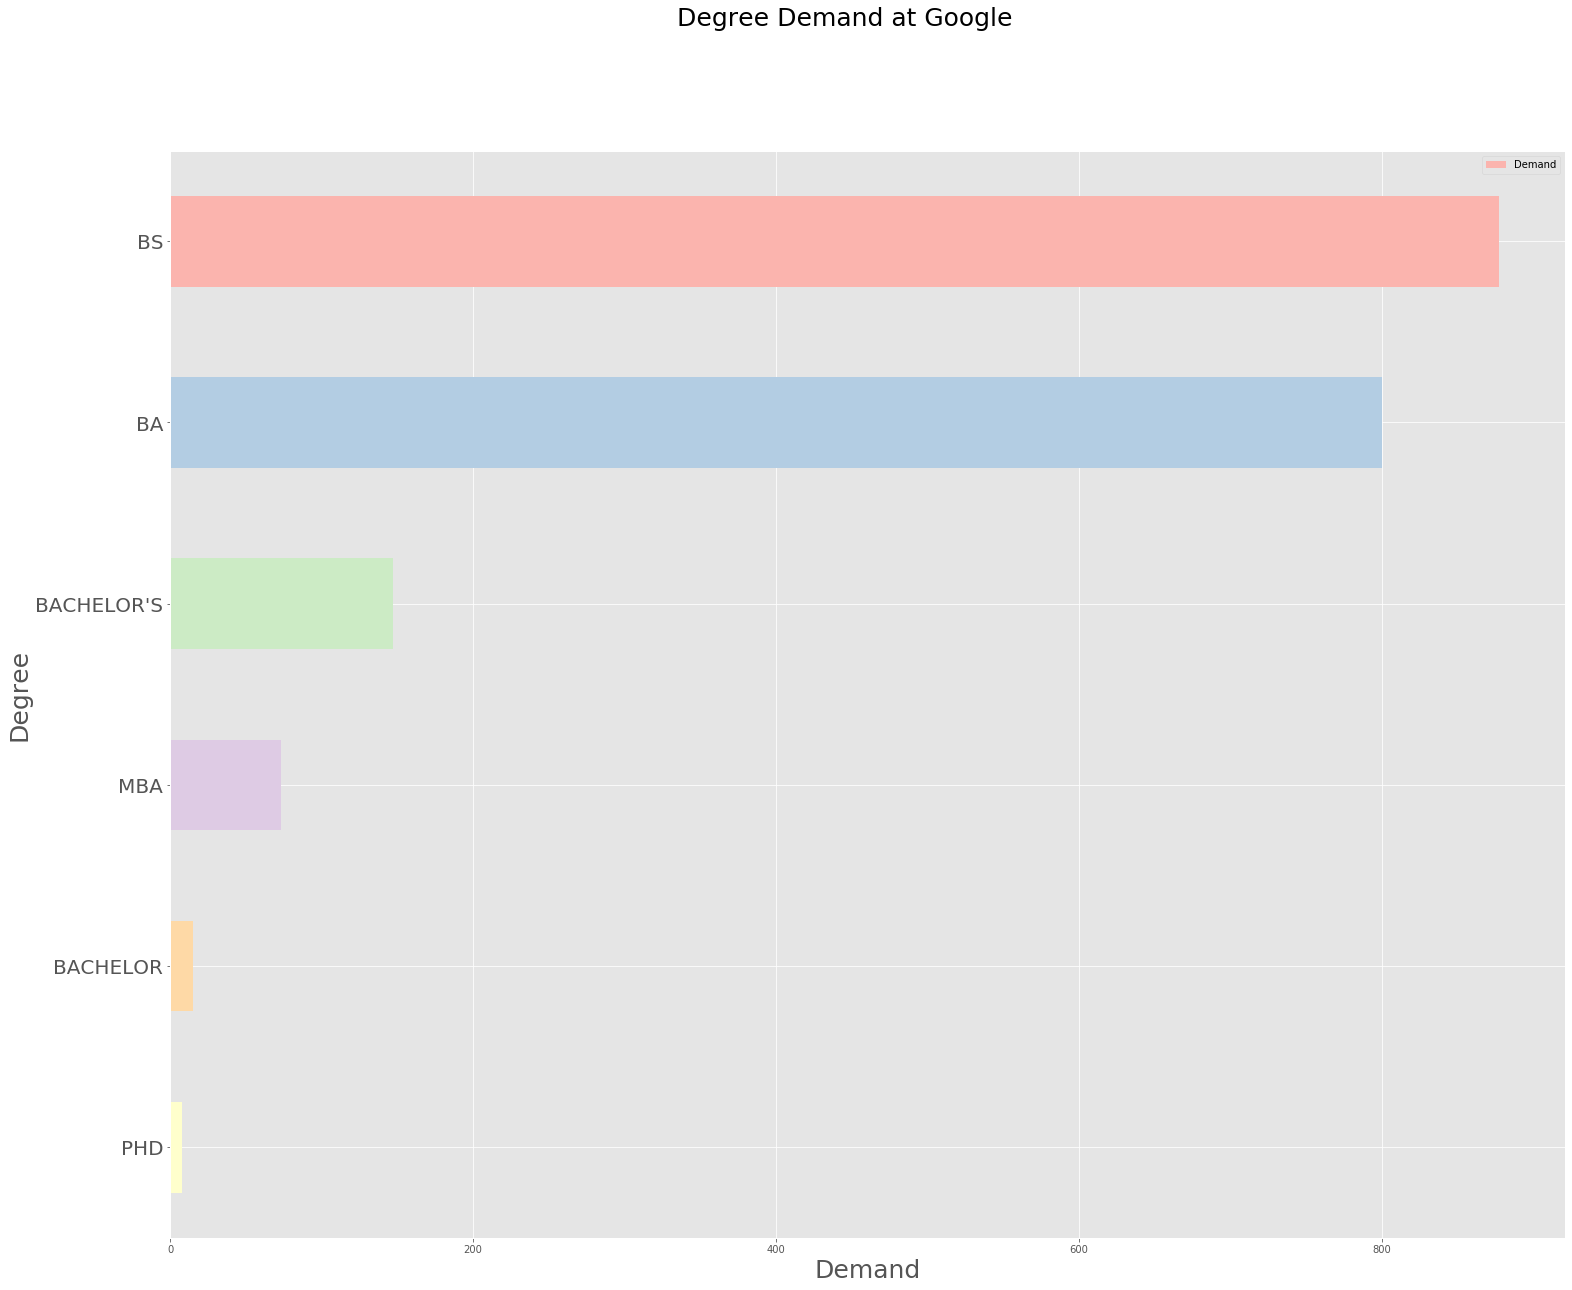

In [91]:
graph(degree_df)

#### Evaluate the Results
Finally, here are the result we found:
<li>Python is the most dominating programming language , we also see that the older programming languages such as JavaScript, SQL, C++ and Java still runs under top 5 list.
<li>When it comes to work experience, 5 years is the most demanded years to work at Google in the career site.
<li>Finally, under the Minimum Qualification section, the most demanded degree is Bachelors Degree.